# Database Management Systems - Lab 2
## Sreehari P Sreedhar
CB.SC.I5DAS20032

In [1]:
from IPython.display import Image

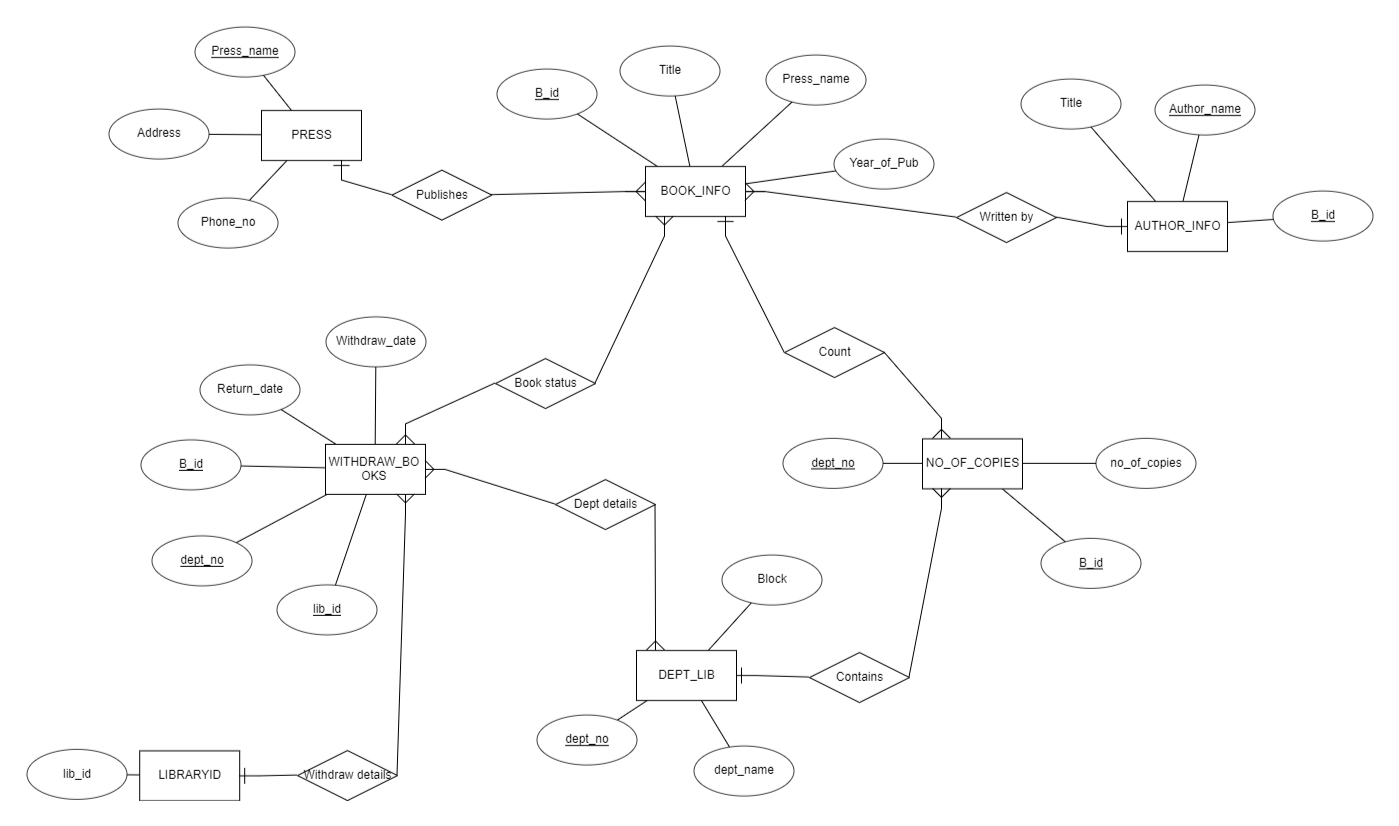

In [2]:
Image("./Assets/lab2ER.png")

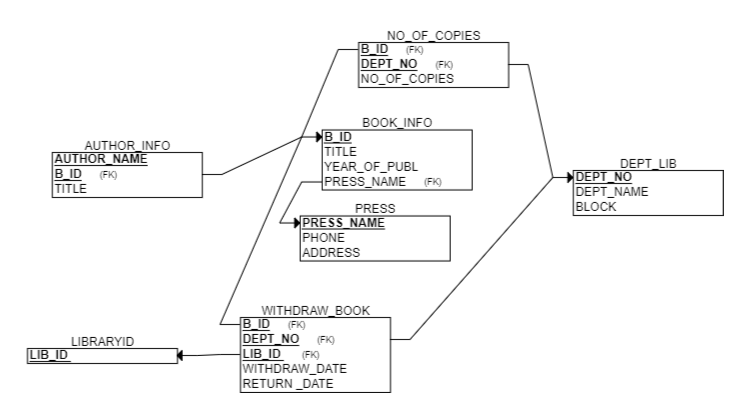

In [3]:
Image("./Assets/lab2Schema.png")

In [45]:
import sqlite3

In [46]:
conn = sqlite3.connect('./Dumps/lab2.db')

cur = conn.cursor()

PRESS (NAME, ADDR, PHNO) 

BOOK_INFO (B_ID, TITLE, PRESS_NAME, YEAR_OF_PUBLICATION) 

AUTHOR_INFO (B_ID, TITLE,AUTHOR_NAME) 

DEPT_LIB(DEPT_NO, DEPT_NAME,DEPT_BLOCK) 

NO_OF_COPIES(B_ID, DEPT_NAME,TOTAL_COPIES) 

WITHDRAW_BOOK(B_ID,DEPT_NAME,LIB_ID,WITHDRAW_DATE,RETURN _DATE) 

LIBRARYID(LIB_ID) 

In [47]:
createTables = '''
BEGIN;

CREATE TABLE PRESS (
    NAME TEXT PRIMARY KEY,
    ADDR TEXT,
    PHNO TEXT
);


CREATE TABLE BOOK_INFO (
    B_ID TEXT PRIMARY KEY,
    TITLE TEXT PRIMAY KEY,
    PRESS_NAME TEXT REFERENCES PRESS(NAME) ON DELETE CASCADE,
    YEAR_OF_PUBLICATION INT
);

CREATE TABLE AUTHOR_INFO (
    TITLE TEXT PRIMARY KEY,
    B_ID TEXT REFERENCES BOOK_INFO(B_ID) ON DELETE CASCADE,
    AUTHOR_NAME TEXT
);

CREATE TABLE DEPT_LIB (
    DEPT_NO INT PRIMARY KEY,
    DEPT_NAME TEXT,
    DEPT_BLOCK TEXT
);

CREATE TABLE NO_OF_COPIES (
    B_ID TEXT PRIMARY KEY,
    DEPT_NO INT REFERENCES DEPT_LIB(DEPT_NO) ON DELETE CASCADE,
    TOTAL_COPIES INT
);

CREATE TABLE LIBRARYID (
    LIB_ID INT PRIMARY KEY
);

CREATE TABLE WITHDRAW_BOOK (
    B_ID TEXT PRIMARY KEY,
    DEPT_NO TEXT REFERENCES DEPT_LIB(DEPT_NO) ON DELETE CASCADE,
    LIB_ID INT REFERENCES LIBRARYID(LIB_ID) ON DELETE CASCADE,
    WITHDRAW_DATE DATE,
    RETURN_DATE DATE 
);

COMMIT;
'''

In [48]:
cur.executescript(createTables)

In [49]:
press = [
    ('holmes', '221B', '132324'),
    ('holmes Jr.', 'Pall Mall', '156324')
]

cur.executemany('INSERT INTO PRESS VALUES (?, ?, ?)', press)

In [50]:
book_info = [
    ('b1', 'On the Origins of Tree Worship', 'holmes', '1896'),
    ('b2', 'Bee Culture', 'holmes Jr.', '1890'),
    ('b3', 'Khalifa of Khatoum', 'holmes', '1896'),
    ('b4', 'Neath the Reichenbach', 'holmes Jr.', '1898'),
]

cur.executemany('INSERT INTO BOOK_INFO VALUES (?, ?, ?, ?)', book_info)

In [51]:
author_info = [
    ('On the Origins of Tree Worship', 'b1', 'Sigerson'),
    ('Bee Culture', 'b2', 'Sherlock'),
    ('Khalifa of Khartoum', 'b3', 'Sigerson'),
    ('Neath the Reichenback', 'b4', 'Sherlock')
]

cur.executemany('INSERT INTO AUTHOR_INFO VALUES (?, ?, ?)', author_info)

In [52]:
dept_lib = [
    (1, 'D1', 'Block 1'),
    (2, 'D2', 'Block 2')
]

cur.executemany('INSERT INTO DEPT_LIB VALUES (?, ?, ?)', dept_lib)

In [53]:
no_of_copies = [
    ('b1', 1, 69),
    ('b2', 2, 420)
]

cur.executemany('INSERT INTO NO_OF_COPIES VALUES (?, ?, ?)', no_of_copies)

In [54]:
libraryid = [
    (1, ),
    (2, )
]

cur.executemany('INSERT INTO LIBRARYID VALUES (?)', libraryid)

In [55]:
withdraw_book = [
    ('b1', 1, 1, '2022-08-05', '2022-08-09'),
    ('b2', 2, 2, '2022-07-09', '2022-08-11')
]

cur.executemany('INSERT INTO WITHDRAW_BOOK VALUES (?, ?, ?, ?, ?)', withdraw_book)

In [56]:
conn.commit()

DISPLAY THE FOLLOWING DETAILS OF BOOKS FROM THE LIBRARY USING A SINGLE QUERY [B_ID, TITLE, PRESS_NAME, AUTHOR_NAME, TOTAL_COPIES]

In [57]:
res1 = cur.execute('''
    SELECT B.B_ID, B.TITLE, B.PRESS_NAME, A.AUTHOR_NAME, N.TOTAL_COPIES
    FROM BOOK_INFO B 
    INNER JOIN AUTHOR_INFO A ON A.B_ID = B.B_ID
    INNER JOIN NO_OF_COPIES N ON B.B_ID = N.B_ID
''')

res1.fetchall()

[('b1', 'On the Origins of Tree Worship', 'holmes', 'Sigerson', 69),
 ('b2', 'Bee Culture', 'holmes Jr.', 'Sherlock', 420)]

Display the details of the students withdrawn the books between 16.05.2022 and 16.08.2022 

In [58]:
res2 = cur.execute('''
    SELECT * FROM WITHDRAW_BOOK 
    WHERE WITHDRAW_DATE BETWEEN '2022-05-16' AND '2022-08-16'
''')

res2.fetchall()

[('b1', '1', 1, '2022-08-05', '2022-08-09'),
 ('b2', '2', 2, '2022-07-09', '2022-08-11')]

In [59]:
res3 = cur.execute('''
    DELETE FROM BOOK_INFO WHERE B_ID = 'b1'    
''')

res3.fetchall()

[]

In [60]:
commands = [
    'SELECT * FROM BOOK_INFO',
    'SELECT * FROM WITHDRAW_BOOK',
    'SELECT * FROM NO_OF_COPIES',
    'SELECT * FROM AUTHOR_INFO'
]

for command in commands:
    print(command)
    print(cur.execute(command).fetchall())

SELECT * FROM BOOK_INFO
[('b2', 'Bee Culture', 'holmes Jr.', 1890), ('b3', 'Khalifa of Khatoum', 'holmes', 1896), ('b4', 'Neath the Reichenbach', 'holmes Jr.', 1898)]
SELECT * FROM WITHDRAW_BOOK
[('b1', '1', 1, '2022-08-05', '2022-08-09'), ('b2', '2', 2, '2022-07-09', '2022-08-11')]
SELECT * FROM NO_OF_COPIES
[('b1', 1, 69), ('b2', 2, 420)]
SELECT * FROM AUTHOR_INFO
[('On the Origins of Tree Worship', 'b1', 'Sigerson'), ('Bee Culture', 'b2', 'Sherlock'), ('Khalifa of Khartoum', 'b3', 'Sigerson'), ('Neath the Reichenback', 'b4', 'Sherlock')]


Partition the BOOK_INFO table based on the NO_OF_COPIES. Illustrate this with a simple query in Data Manipulation. 

Assume that you have received few new copies of books (for the books which are already available) for your Library., then Update the values of No_of_Copies Attribute in NO_OF_COPIES table.

In [61]:
res5Verify = cur.execute('''
    SELECT * FROM NO_OF_COPIES WHERE B_ID = 'b2'
    ''')

res5Verify.fetchall()

[('b2', 2, 420)]

In [62]:
res5 = cur.execute('''
    UPDATE NO_OF_COPIES SET TOTAL_COPIES = TOTAL_COPIES + 5 WHERE B_ID = 'b2'
    ''')

res5.fetchall()

[]

In [63]:
res5Verify = cur.execute('''
    SELECT * FROM NO_OF_COPIES WHERE B_ID = 'b2'
    ''')

res5Verify.fetchall()

[('b2', 2, 425)]

Display the details of books with same author name in AUTHOR_TABLE. Group it w.r.to AUTHOR_NAME column and display the no of books available with the same author name.


In [64]:
res6 = cur.execute('''
    SELECT AUTHOR_NAME, COUNT(B_ID) 
    FROM AUTHOR_INFO 
    GROUP BY AUTHOR_NAME
    ''')

res6.fetchall()

[('Sherlock', 2), ('Sigerson', 2)]

In [65]:
conn.commit()

In [66]:
conn.close()